<a href="https://colab.research.google.com/github/ThisIsFarhan/Language_Models/blob/main/3_Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTES

## Instruction Based Prompting

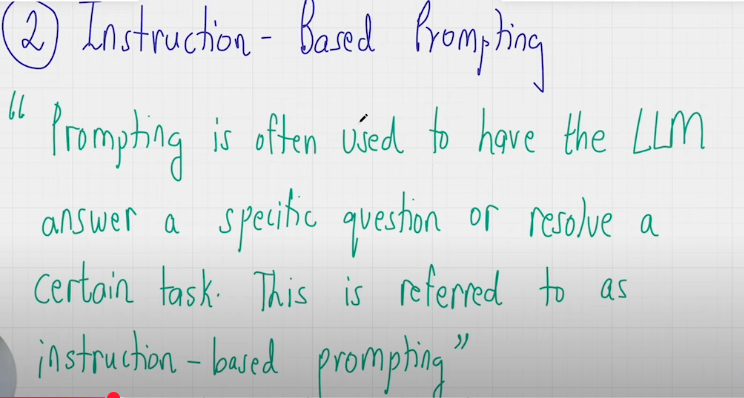

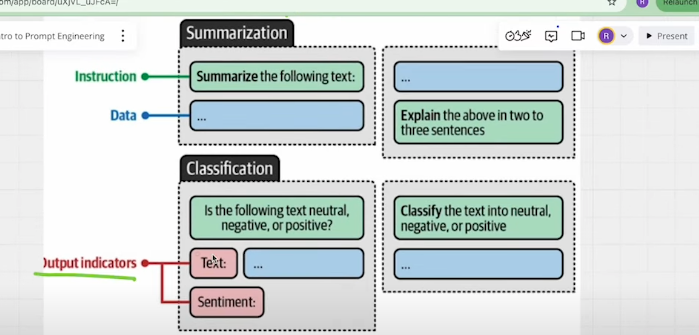

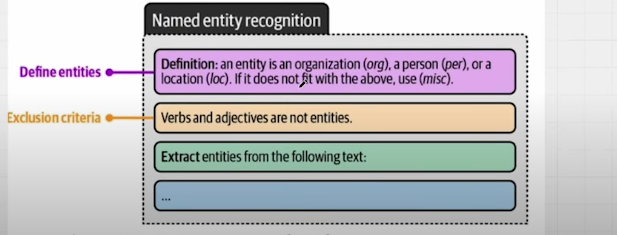

## Techniques for better prompts

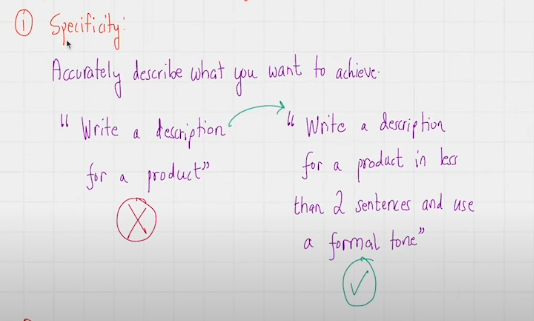

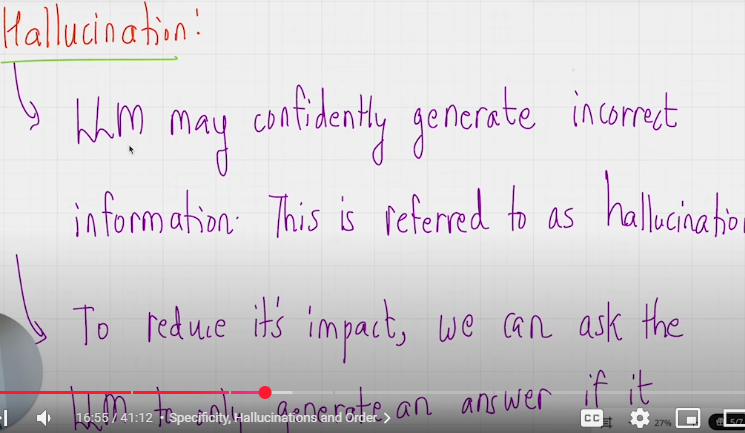

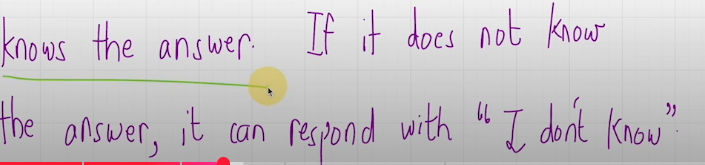

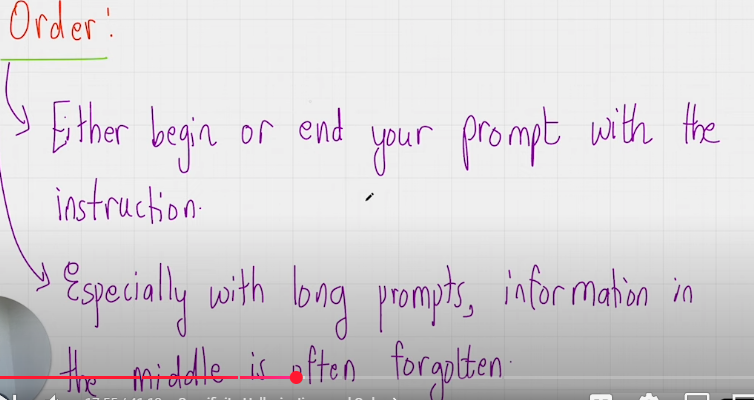

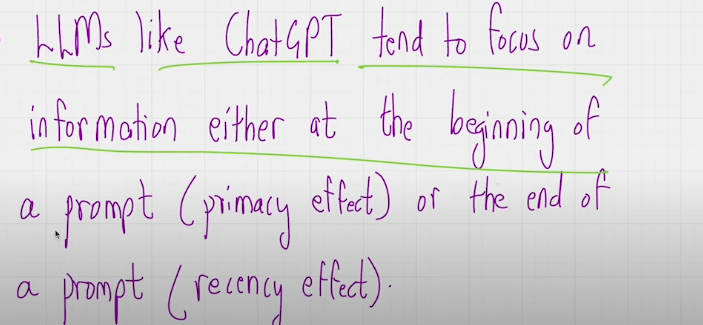

## 7 Components of an effective prompt

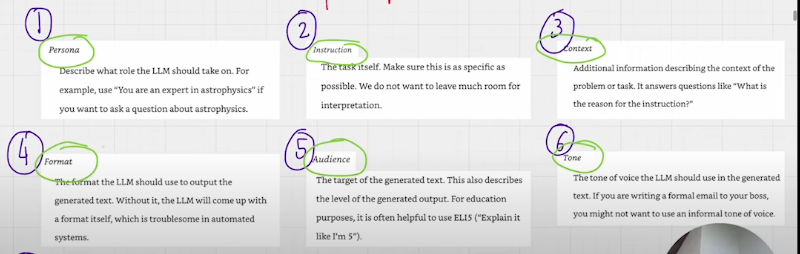

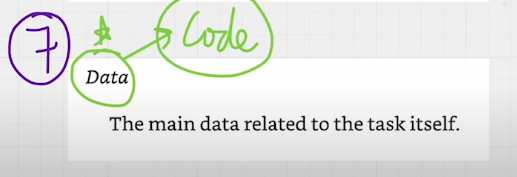

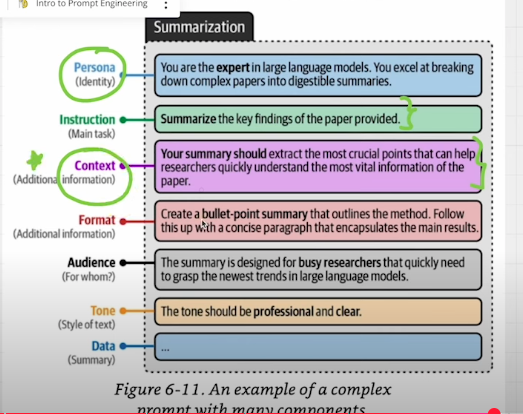

# INTRO TO PROMPT ENGINEERING

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-4k-instruct",
    #device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

# Create a pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=False,
    max_new_tokens=500,
    do_sample=False,
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu


In [ ]:
# Prompt
messages = [
    {"role": "user", "content": "Create a funny joke about chickens."}
]

# Generate the output
output = pipe(messages)
print(output[0]["generated_text"])

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


 Why did the chicken join the band? Because it had the drumsticks!


In [ ]:
# Apply prompt template
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False)
print(prompt)

<|user|>
Create a funny joke about chickens.<|end|>
<|endoftext|>


In [ ]:
# Using a high temperature
output = pipe(messages, do_sample=True, temperature=1)
print(output[0]["generated_text"])

 Why did the rooster break up with the hen? Because he needed more chicken-ism in the relationship!


In [ ]:
# Using a high top_p
output = pipe(messages, do_sample=True, top_p=1)
print(output[0]["generated_text"])

 Why do chickens make terrible comedy acts? Because even their jokes can't peck away at their own punchlines!


In [ ]:
# Text to summarize which we stole from https://jalammar.github.io/illustrated-transformer/ ;)
text = """In the previous post, we looked at Attention – a ubiquitous method in modern deep learning models. Attention is a concept that helped improve the performance of neural machine translation applications. In this post, we will look at The Transformer – a model that uses attention to boost the speed with which these models can be trained. The Transformer outperforms the Google Neural Machine Translation model in specific tasks. The biggest benefit, however, comes from how The Transformer lends itself to parallelization. It is in fact Google Cloud’s recommendation to use The Transformer as a reference model to use their Cloud TPU offering. So let’s try to break the model apart and look at how it functions.
The Transformer was proposed in the paper Attention is All You Need. A TensorFlow implementation of it is available as a part of the Tensor2Tensor package. Harvard’s NLP group created a guide annotating the paper with PyTorch implementation. In this post, we will attempt to oversimplify things a bit and introduce the concepts one by one to hopefully make it easier to understand to people without in-depth knowledge of the subject matter.
Let’s begin by looking at the model as a single black box. In a machine translation application, it would take a sentence in one language, and output its translation in another.
Popping open that Optimus Prime goodness, we see an encoding component, a decoding component, and connections between them.
The encoding component is a stack of encoders (the paper stacks six of them on top of each other – there’s nothing magical about the number six, one can definitely experiment with other arrangements). The decoding component is a stack of decoders of the same number.
The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:
The encoder’s inputs first flow through a self-attention layer – a layer that helps the encoder look at other words in the input sentence as it encodes a specific word. We’ll look closer at self-attention later in the post.
The outputs of the self-attention layer are fed to a feed-forward neural network. The exact same feed-forward network is independently applied to each position.
The decoder has both those layers, but between them is an attention layer that helps the decoder focus on relevant parts of the input sentence (similar what attention does in seq2seq models).
Now that we’ve seen the major components of the model, let’s start to look at the various vectors/tensors and how they flow between these components to turn the input of a trained model into an output.
As is the case in NLP applications in general, we begin by turning each input word into a vector using an embedding algorithm.
Each word is embedded into a vector of size 512. We'll represent those vectors with these simple boxes.
The embedding only happens in the bottom-most encoder. The abstraction that is common to all the encoders is that they receive a list of vectors each of the size 512 – In the bottom encoder that would be the word embeddings, but in other encoders, it would be the output of the encoder that’s directly below. The size of this list is hyperparameter we can set – basically it would be the length of the longest sentence in our training dataset.
After embedding the words in our input sequence, each of them flows through each of the two layers of the encoder.
Here we begin to see one key property of the Transformer, which is that the word in each position flows through its own path in the encoder. There are dependencies between these paths in the self-attention layer. The feed-forward layer does not have those dependencies, however, and thus the various paths can be executed in parallel while flowing through the feed-forward layer.
Next, we’ll switch up the example to a shorter sentence and we’ll look at what happens in each sub-layer of the encoder.
Now We’re Encoding!
As we’ve mentioned already, an encoder receives a list of vectors as input. It processes this list by passing these vectors into a ‘self-attention’ layer, then into a feed-forward neural network, then sends out the output upwards to the next encoder.
"""

# Prompt components
persona = "You are an expert in Large Language models. You excel at breaking down complex papers into digestible summaries.\n"
instruction = "Summarize the key findings of the paper provided.\n"
context = "Your summary should extract the most crucial points that can help researchers quickly understand the most vital information of the paper.\n"
data_format = "Create a bullet-point summary that outlines the method. Follow this up with a concise paragraph that encapsulates the main results.\n"
audience = "The summary is designed for busy researchers that quickly need to grasp the newest trends in Large Language Models.\n"
tone = "The tone should be professional and clear.\n"
text = "MY TEXT TO SUMMARIZE"  # Replace with your own text to summarize
data = f"Text to summarize: {text}"

# The full prompt - remove and add pieces to view its impact on the generated output
query = persona + instruction + context + data_format + audience + tone + data

In [ ]:
messages = [
    {"role": "user", "content": query}
]
print(tokenizer.apply_chat_template(messages, tokenize=False))

<|user|>
You are an expert in Large Language models. You excel at breaking down complex papers into digestible summaries.
Summarize the key findings of the paper provided.
Your summary should extract the most crucial points that can help researchers quickly understand the most vital information of the paper.
Create a bullet-point summary that outlines the method. Follow this up with a concise paragraph that encapsulates the main results.
The summary is designed for busy researchers that quickly need to grasp the newest trends in Large Language Models.
The tone should be professional and clear.
Text to summarize: MY TEXT TO SUMMARIZE<|end|>
<|endoftext|>


In [ ]:
# Generate the output
outputs = pipe(messages)
print(outputs[0]["generated_text"])

 - The paper investigates the impact of pre-training data size on the performance of Large Language Models (LLMs).

- It compares models trained on different volumes of data, ranging from smaller datasets to those encompassing billions of tokens.

- The study utilizes a series of benchmarks to evaluate the models' abilities in various natural language processing tasks.

- Results indicate that models trained on larger datasets generally outperform those trained on smaller datasets across most benchmarks.

- However, the paper also notes diminishing returns in performance improvements beyond a certain data size threshold.

- The researchers suggest that the optimal data size for training LLMs may vary depending on the specific task and model architecture.


The paper presents a comprehensive analysis of how the size of pre-training data influences the efficacy of Large Language Models. By comparing models trained on datasets of varying sizes, the study reveals a clear trend: larger data

# ADVANCED PROMPT ENGINEERING TECHNIQUES

## In-Context Prompting (No-shot, Zero-shot, Few-shot)

In [ ]:
prompt = [
    {"role":"user","content":"A 'Gigamuru' is a type of Japanese musical instrument. An example of a sentence that uses the word Gigamuru is:"},
    {"role":"assistant","content":"I have a Gigamuru that my uncle gave me as a gift. I love to play it at home."},
    {"role":"user","content":"To 'screeg' something is to swing a sword at it. An example of a sentence that uses the word screeg is:"}
]

In [ ]:
print(tokenizer.apply_chat_template(prompt, tokenize=False))

<|user|>
A 'Gigamuru' is a type of Japanese musical instrument. An example of a sentence that uses the word Gigamuru is:<|end|>
<|assistant|>
I have a Gigamuru that my uncle gave me as a gift. I love to play it at home.<|end|>
<|user|>
To 'screeg' something is to swing a sword at it. An example of a sentence that uses the word screeg is:<|end|>
<|endoftext|>


In [ ]:
print(pipe(prompt)[0]["generated_text"])

 During the medieval reenactment, the knight skillfully screeged the wooden target with precision, impressing the onlookers.


## Chain Prompting

In [ ]:
product_prompt = [
    {"role": "user", "content": "Create a name and slogan for a chatbot that leverages LLMs."}
]
op = pipe(product_prompt)
required_data = op[0]["generated_text"]
print(required_data)

 Name: ChatSage
Slogan: "Unleashing the power of AI to enhance your conversations."


In [ ]:
sales_prompt = [
    {"role": "user", "content": f"Generate a very short sales pitch for the following product: '{required_data}'"}
]
op= pipe(sales_prompt)
print(op[0]['generated_text'])

 Introducing ChatSage, the ultimate AI companion that revolutionizes your conversations. With our cutting-edge technology, we unleash the power of AI to enhance your interactions, making every conversation more engaging and meaningful. Experience the future of communication with ChatSage today!


## Chain of thought

In [ ]:
# Answering with chain-of-thought
cot_prompt = [
    {"role": "user", "content": "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?"},
    {"role": "assistant", "content": "Roger started with 5 balls. 2 cans of 3 tennis balls each is 6 tennis balls. 5 + 6 = 11. The answer is 11."},
    {"role": "user", "content": "The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?"}
]

# Generate the output
outputs = pipe(cot_prompt)
print(outputs[0]["generated_text"])

 The cafeteria started with 23 apples. They used 20 apples to make lunch, so they had 23 - 20 = 3 apples left. After buying 6 more apples, they now have 3 + 6 = 9 apples. The answer is 9.


In [ ]:
# Zero-shot Chain-of-Thought
zeroshot_cot_prompt = [
    {"role": "user", "content": "The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have? Let's think step-by-step."}
]

# Generate the output
outputs = pipe(zeroshot_cot_prompt)
print(outputs[0]["generated_text"])

 Step 1: The cafeteria starts with 23 apples.
Step 2: They used 20 apples to make lunch, so we subtract 20 from the initial amount: 23 - 20 = 3 apples remaining.
Step 3: The cafeteria bought 6 more apples, so we add 6 to the remaining amount: 3 + 6 = 9 apples.

The cafeteria now has 9 apples.


## Tree of Thought

In [ ]:
zeroshot_tot_prompt = [
    {"role": "user", "content": "Imagine three different experts are answering this question. All experts will write down 1 step of their thinking, then share it with the group. Then all experts will go on to the next step, etc. If any expert realises they're wrong at any point then they leave. The question is 'The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?' Make sure to discuss the results."}
]

In [ ]:
# Generate the output
outputs = pipe(zeroshot_tot_prompt)
print(outputs[0]["generated_text"])